In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'CSV\confidence_nums.csv')

In [4]:
df.columns = df.columns.str.replace('_confidence-num', '')

In [6]:
name_mapping = {
    'gpt-4-0613': 'GPT-4 api',
    'gpt-4o-2024-05-13': 'GPT-4o',
    'GPT4Web': 'GPT-4 Web-interface',
    'gpt-4o-mini-2024-07-18': 'GPT-4o Mini',
    'GPT3.5Web': 'GPT-3.5 Web-interface',
    'claude-3-5-sonnet-20240620': 'Claude 3.5 Sonnet',
    'ClaudeOpuWeb-raw': 'Claude Opus Web-interface',
    'claude-3-opus-20240229': 'Claude 3 Opus api',
    'claude-3-sonnet-20240229': 'Claude 3 Sonnet api',
    'ClaudeSonnetWeb-raw': 'Claude 3 Sonnet Web-interface',
    'ClaudeHiakuWeb-raw': 'Claude 3 Haiku Web-interface',
    'claude-3-haiku-20240307': 'Claude 3 Haiku api',
    'MistralLarge-Poe': 'Mistral Large',
    'mistral-instruct-v2-Q8': 'Mistral v2 Q8',
    'Mistral-7B-T': 'Mistral 7B',
    'Mixtral-8x7B-Poe': 'Mixtral 8x7B',
    'gemma2-9b-it': 'Gemma 2 9B',
    'GeminiWeb-raw': 'Gemini Web-interface',
    'GeminiAdvancedWeb-raw': 'Gemini Advanced Web-interface',
    'gemma2-27b-it': 'Gemma 2 27B',
    'Gemma2-9b-Q8': 'Gemma 2 9B Q8',
    'Phi3-medium14b-Q6': 'Phi-3 Medium 14B Q6',
    'phi3-3b-Q16': 'Phi-3 3B FP16',
    'Llama3.1-405B': 'Llama 3.1 405B',
    'Llama3-70b-Poe': 'Llama 3 70B',
    'Llama3.1-70B': 'Llama 3.1 70B',
    'Llama3.1-8B': 'Llama 3.1 8B',
    'llama2-13B-Q5KM': 'Llama 2 13B Q5KM',
    'Llama-2-13b': 'Llama 2 13B',
    'Llama270B-Poe': 'Llama 2 70B',
    'Llama27B-Poe': 'Llama 2 7B',
    'llama3-8b-Q8': 'Llama 3 8B Q8',
    'llama2-7B-Q8': 'Llama 2 7B Q8',
    'Llama3-8b-Poe': 'Llama 3 8B'
}

In [7]:
df = df.rename(columns=name_mapping)

In [8]:
df.head()

,Claude 3 Haiku Web-interface,Claude 3 Sonnet Web-interface,Claude Opus Web-interface,Gemini Web-interface,Gemini Advanced Web-interface,gpt-3.5-turbo-0125,GPT-4 api,GPT-3.5 Web-interface,GPT-4 Web-interface,Llama 2 13B Q5KM,...,GPT-4o Mini,Gemma 2 9B,Gemma 2 9B Q8,Mistral 7B,Llama 2 13B,Phi-3 Medium 14B Q6,Llama 3.1 405B,Llama 3.1 70B,Llama 3.1 8B,Gemma 2 27B
0,8,8,8,7,7,9,not_mentioned,9,9,9,...,9,not_mentioned,8,10,7.0,8.0,9,8,9.0,8
1,9,9,8,9,9,not_mentioned,9,9,9,9,...,9,not_mentioned,9,10,9.0,9.0,9,9,10.0,9
2,8,8,8,cell_empty,8,9,9,8,9,9,...,9,not_mentioned,8,10,9.0,9.0,9,9,9.0,8
3,9,9,8,8,8,not_mentioned,not_mentioned,9,9,8,...,9,9,9,9,9.0,9.0,10,9,9.0,9
4,9,9,8,9,cell_empty,9,not_mentioned,8,9,8,...,9,not_mentioned,9,9,8.0,8.0,8,9,9.0,9


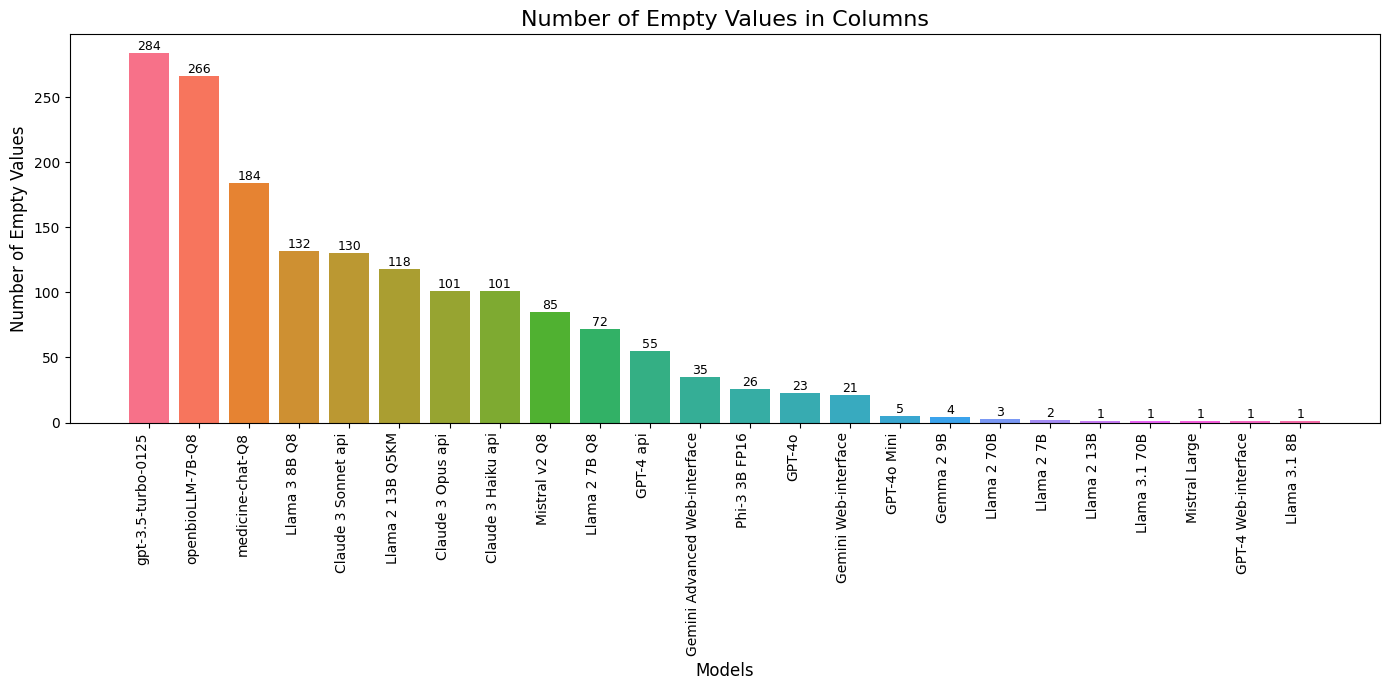

In [14]:
# Function to check if a column has empty values
def has_empty_values(column):
    return column.isin(['not_mentioned', 'cell_empty']).any()

# Get columns with empty values
columns_with_empty = [col for col in df.columns if has_empty_values(df[col])]

# Calculate the count of empty values for each column
empty_counts = df[columns_with_empty].isin(['not_mentioned', 'cell_empty']).sum()

# Sort the counts in descending order
empty_counts_sorted = empty_counts.sort_values(ascending=False)

# Create a color palette
colors = sns.color_palette("husl", len(empty_counts_sorted))

# Create a bar plot
plt.figure(figsize=(14, 7))
bars = plt.bar(empty_counts_sorted.index, empty_counts_sorted.values, color=colors)
plt.title('Number of Empty Values in Columns', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Number of Empty Values', fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Add count labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,}',
             ha='center', va='bottom', fontsize=9)
    
plt.savefig('empty_values_count_plot.png', dpi=300, bbox_inches='tight')
plt.savefig('empty_values_count_plot.pdf', dpi=300, bbox_inches='tight')
plt.savefig('empty_values_count_plot.jpg', dpi=300, bbox_inches='tight')